당뇨병 유무와 신체검사데이터

컬럼설명

|Pregenncies|Glucose|BloodPressure|SkinThickness|
|---|---|---|---|
|임신횟수|포도당|혈압|피부두께|
|Insulin|BMI|DiabetesPedigreeFunction|Age|
|2시간혈청인슐린|BMI|당뇨병혈통기능|나이|

위의 변수에 따라 당뇨병 유무 결과(Outcome)를 예측하는 이진분류문제임


1. 데이터 탐색 (시각화 포함 탐색적자료분석, 이상치 식별처리, 분석시고려할점)
2. 클래스 불균형 처리 (업,언더, 둘중하나 택한다면)
3. 모델링 (3개이상의 알고리즘 제시라고 정확도 측면1개, 속도측면 1개 선정, 비교/결과설명, 속도개선위한 차원축소 설명하고 수행)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../data/diabetes_for_test.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
df.select_dtypes('number') #전부 수치형임을 확인

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,36.980469,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,61.404453,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,999.000000,1.000000


## 시각화

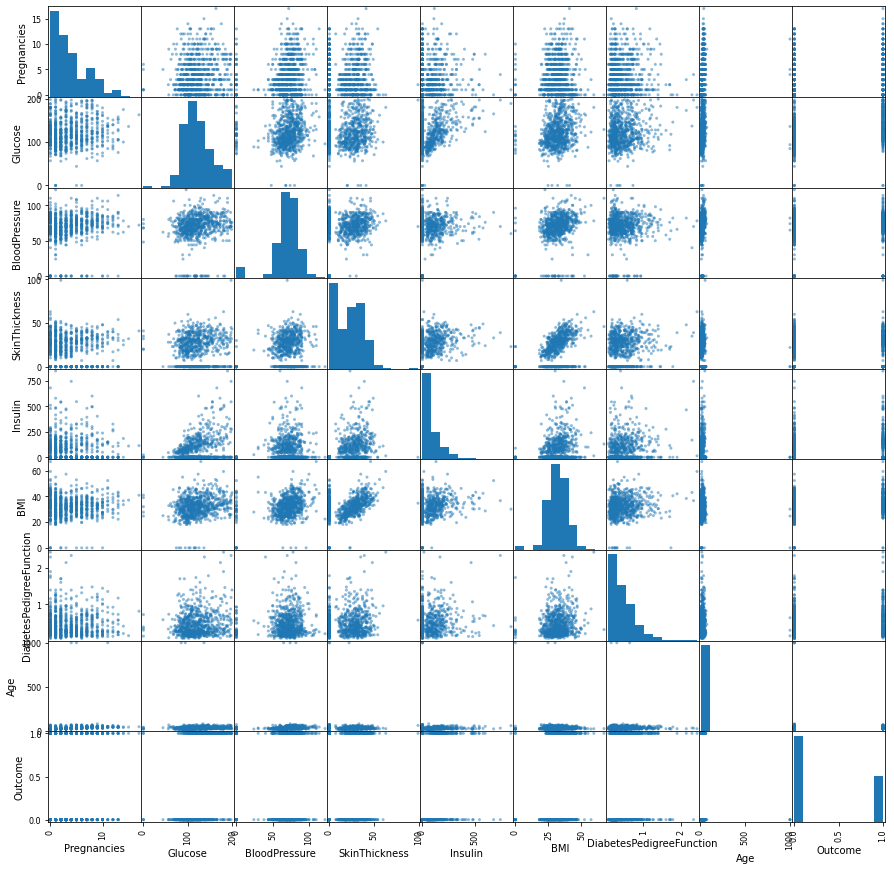

In [5]:
pd.plotting.scatter_matrix(df,figsize=(15,15));

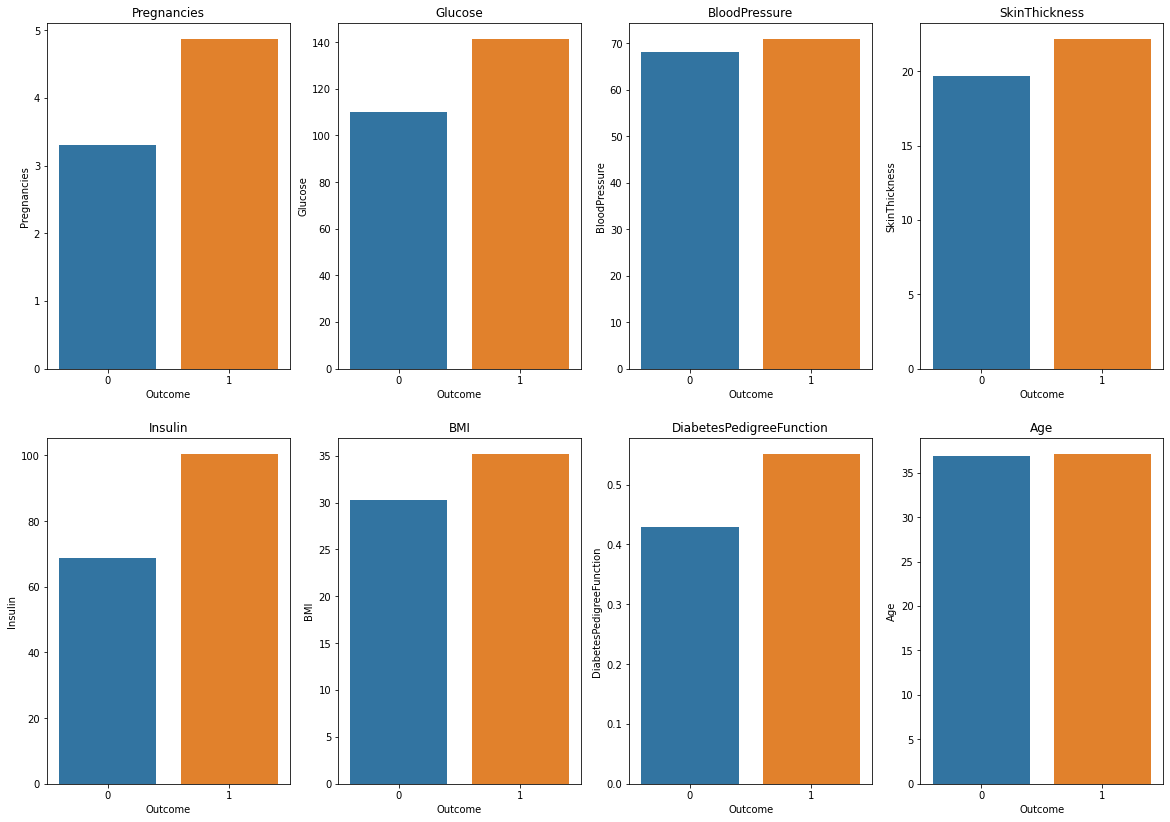

In [6]:
fc = df.groupby('Outcome').mean()

fig, ax = plt.subplots(2,4, figsize= (20,14))

for idx in range(8):
    
    i = idx // 4
    j = idx % 4
    sns.barplot(fc.index, fc.iloc[:,idx], ax = ax[i][j])
    ax[i,j].set_title(fc.columns[idx])


당뇨병 있는 사람은 임신, 인슐린, 글루코스 등 높은 것 확인

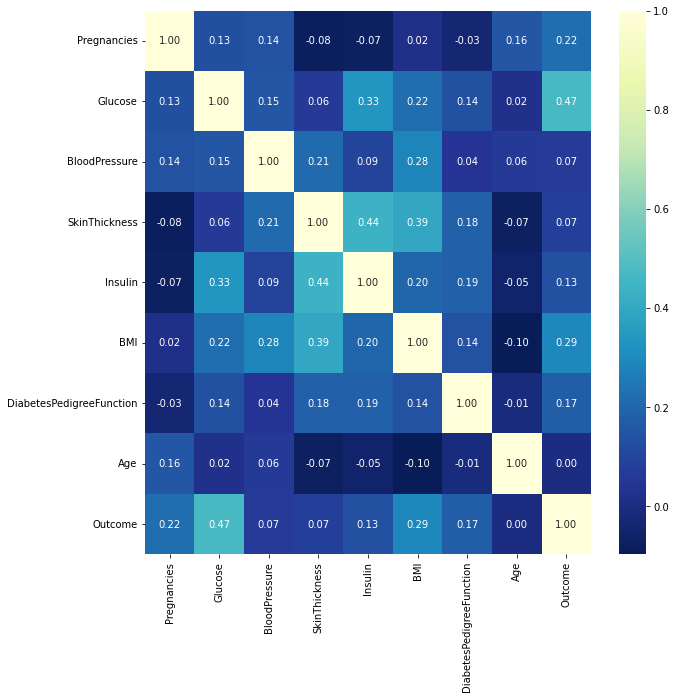

In [7]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),
annot = True,
cmap ='YlGnBu_r',
fmt= '.2f'
);

90%이상 되는 다중공산성에 해당하는 변수는 없음

## 이상치 제거

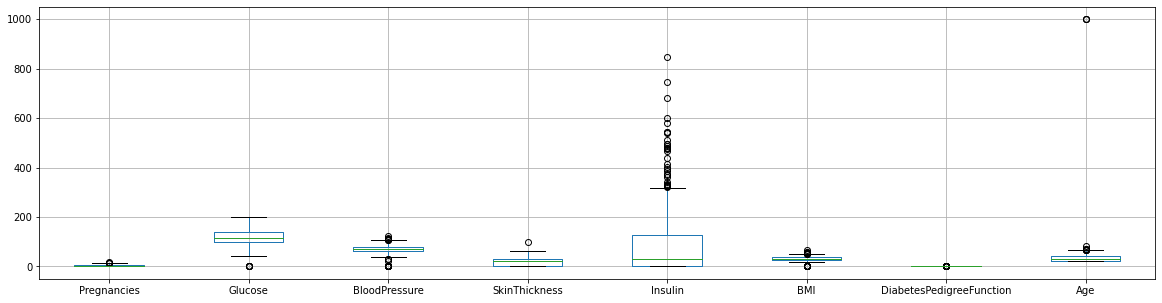

In [8]:
df.iloc[:,:-1].boxplot(figsize=(20,5));

In [9]:
df.shape, df[df.Age==999].shape # 3개 정도의 샘플이므로 정확한 판단을 위해 제거

((768, 9), (3, 9))

In [10]:
df1 = df[df.Age != 999]


In [11]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,3.833987,120.956863,69.087582,20.588235,80.112418,32.046405,0.472305,33.207843,0.350327
std,3.365967,31.989478,19.386775,15.948760,115.361294,7.809429,0.331657,11.703467,0.477384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.000000,36.600000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
(df1.BloodPressure == 0).sum(), (df1.Glucose ==0).sum()

(35, 5)

혈압이 0인 자료는 35개로 너무 많기에 중앙값으로 대체, Glucose도 중앙값 대체

In [13]:
df1.loc[df1.BloodPressure == 0,'BloodPressure'] = df1.BloodPressure.median()
df1.loc[df1.Glucose == 0,'Glucose'] = df1.Glucose.median()

(df1.BloodPressure == 0).sum()
(df1.Glucose == 0 ).sum()

0

## 업샘플링, 다운샘플링

In [14]:
df1['Outcome'].value_counts() # 타겟값이 적은 불균형데이터임

0    497
1    268
Name: Outcome, dtype: int64

오버샘플링 기법은 데이터를 추가로 생성해 데이터를 늘려서 불균형을 극복하는 방식이다. 소수 레이블을 가진 데이터셋을 증식시켜서 학습에 출분한 데이터를 확보한다. 
언더샘플링은 손실의 문제로 예측성능이 저하되는 단점이 있으므로 일반적으로는 오버샘플링을 활용한다.
1. Random Over
데이터를 단순 복사하는 방식으로, 소수클래스에 과적합 발생 가능성 있음
2. SMOTE
k최근접이웃을 찾아, 새로운 데이터를 생성하는 방식으로 과적합문제를 해결, 단 속도가 느리다

In [15]:
!pip install imblearn

In [16]:
from imblearn.over_sampling import RandomOverSampler
X= df1.drop(['Outcome'],axis=1)
y = df1[['Outcome']]

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)
print(y_ros.value_counts())

Outcome
0          497
1          497
dtype: int64


In [17]:
from imblearn.over_sampling import SMOTE
sos = SMOTE()

X_sos, y_sos = sos.fit_resample(X,y)
print(y_sos.value_counts())

Outcome
0          497
1          497
dtype: int64


In [18]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(X,y)
print(y_rus.value_counts())

Outcome
0          268
1          268
dtype: int64


## 모델 비교

logisticReg, SVM, XGBoost

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import time 


lg = LogisticRegression()
svc = SVC()
xgb = XGBClassifier()

datapl = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

X1= datapl.fit_transform(X)

smote = SMOTE()
X2, y2 = smote.fit_resample(X1,y.values)
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3)

def model(model,X_train = X_train, X_test = X_test, y_train = y_train, y_test=y_test ):
    stime = time.time() 
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test,preds)
    recall = recall_score(y_test,preds)
    precision= precision_score(y_test,preds)
    f1 = f1_score(y_test,preds)
    # auc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])


    etime = time.time()
    print("-----------------")
    print(f"{model}"[:10])
    print(round(etime -stime,2), "초")
    print("정확도 : ", round(accuracy,2))
    print("재현율 : ", round(recall,2))
    print("정밀도 : ", round(precision,2))
    print("f1스코어: ", round(f1,2))
    # print("auc스코어: ",round(auc),2)

for g in [lg,xgb,svc]:
    model(g)



-----------------
LogisticRe
0.02 초
정확도 :  0.8
재현율 :  0.56
정밀도 :  0.74
f1스코어:  0.64
-----------------
XGBClassif
0.26 초
정확도 :  0.77
재현율 :  0.66
정밀도 :  0.63
f1스코어:  0.64
-----------------
SVC()
0.06 초
정확도 :  0.8
재현율 :  0.55
정밀도 :  0.72
f1스코어:  0.62
